# Adding Pokemon images to the dataset

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

from PIL import Image

Images downloaded from https://www.kaggle.com/dollarakshay/pokemon-images and extracted to the `data/POKEMON` folder

In [2]:
!ls -l data/POKEMON | head

total 67312
-rwxr-xr-x@ 1 allank  staff  49853 Nov 28  2017 0001.png
-rwxr-xr-x@ 1 allank  staff  50738 Nov 28  2017 0002.png
-rwxr-xr-x@ 1 allank  staff  47325 Nov 28  2017 0003.png
-rwxr-xr-x@ 1 allank  staff  37739 Nov 28  2017 0004.png
-rwxr-xr-x@ 1 allank  staff  38946 Nov 28  2017 0005.png
-rwxr-xr-x@ 1 allank  staff  47613 Nov 28  2017 0006.png
-rwxr-xr-x@ 1 allank  staff  39660 Nov 28  2017 0007.png
-rwxr-xr-x@ 1 allank  staff  45319 Nov 28  2017 0008.png
-rwxr-xr-x@ 1 allank  staff  52929 Nov 28  2017 0009.png


Read in all the images, extracting the Pokedex number from the filename and converted the image data into a numpy array.

In [3]:
sprites = []
p = Path('data/POKEMON/')
for f in p.iterdir():
    if f.is_file():
        pokedex_number = int(f.name.split('.')[0])
        img = Image.open(f.absolute()).convert("RGBA")
        img_array = np.array(img)
        sprites.append({
            'pokedex_number': pokedex_number,
            'image_data': img_array
        })

Create a dataframe with the image data

In [4]:
df_sprites = pd.DataFrame(sprites)

Test that we can use the data from the dataframe

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

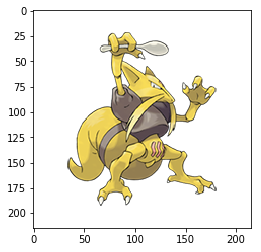

In [6]:
plt.imshow(df_sprites.sample(1).iloc[0]['image_data'])

Works, let's save the dataframe for later use

In [11]:
df_sprites.to_pickle('pokemon_sprites.pickle')

Let's check that we can read the data back in and work with it

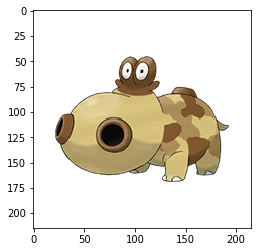

In [12]:
df_test = pd.read_pickle('pokemon_sprites.pickle')
plt.imshow(df_test.sample(1).iloc[0]['image_data'])

All good!